In [24]:
import numpy as np
import pandas as pd
import json
import requests
import ast

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from imdb import IMDb
ia = IMDb()

In [2]:
from eric_keys import eric_omdb_key, eric_tmdb_key, eric_tmdb_token
from eric_analysis import language_count, top_five_lang

In [12]:
# Read Clean csv
df = pd.read_csv('clean_df.csv', index_col='id').sort_index()
df['genre_names']=df['genre_names'].apply(lambda x: ast.literal_eval(x))
df['countries']=df['countries'].apply(lambda x: ast.literal_eval(x))
df

,imdb_id,budget,revenue,genre_names,original_title,runtime,status,countries,title,original_language,...,Family,Crime,War,Science Fiction,Horror,Music,Western,TV Movie,profit,profit_margin
id,,,,,,,,,,,,,,,,,,,,,
55,tt0245712,2000000.0,20908467.0,"[Drama, Thriller]",Amores perros,154.0,Released,[Mexico],Amores Perros,Spanish,...,0,0,0,0,0,0,0,0,18908467.0,90.4
64,tt0287467,NaN,64790996.0,"[Drama, Romance]",Hable con ella,112.0,Released,[Spain],Talk to Her,Spanish,...,0,0,0,0,0,0,0,0,NaN,NaN
79,tt0299977,31000000.0,177395557.0,"[Drama, Adventure, Action, History]",英雄,99.0,Released,[China],Hero,Chinese,...,0,0,0,0,0,0,0,0,146395557.0,82.5
99,tt0185125,8272296.0,67952969.0,"[Comedy, Drama]",Todo sobre mi madre,101.0,Released,"[Spain, France]",All About My Mother,Spanish,...,0,0,0,0,0,0,0,0,59680673.0,87.8
104,tt0130827,1530000.0,7267585.0,"[Action, Drama, Thriller]",Lola rennt,81.0,Released,[Germany],Run Lola Run,German,...,0,0,0,0,0,0,0,0,5737585.0,78.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637920,tt10431500,NaN,17321629.0,"[Drama, Comedy, Family]",7. Koğuştaki Mucize,132.0,Released,[Turkey],Miracle in Cell No. 7,Turkish,...,1,0,0,0,0,0,0,0,NaN,NaN
652483,tt10731748,NaN,NaN,"[Comedy, Romance]",Modo Avião,96.0,Released,[Brazil],Airplane Mode,Portuguese,...,0,0,0,0,0,0,0,0,NaN,NaN
658760,tt9806322,NaN,NaN,"[Romance, Comedy]",Isi & Ossi,113.0,Released,[Germany],Isi & Ossi,German,...,0,0,0,0,0,0,0,0,NaN,NaN


In [72]:
# Create language count df for plotting
lang_count_df = pd.DataFrame(language_count, columns=['language', 'count'])
lang_count_df.set_index('language', inplace=True)

In [129]:
# Create language df for plotting
top_five_df = pd.DataFrame.from_dict(top_five_lang,orient='index')

In [122]:
df.keys()

Index(['imdb_id', 'budget', 'revenue', 'genre_names', 'original_title',
       'runtime', 'status', 'countries', 'title', 'original_language',
       'avg_vote', 'vote_count', 'popularity', 'genres', 'year', '90s', '00s',
       '10s', 'Drama', 'Thriller', 'Romance', 'Adventure', 'Action', 'History',
       'Comedy', 'Mystery', 'Fantasy', 'Animation', 'Family', 'Crime', 'War',
       'Science Fiction', 'Horror', 'Music', 'Western', 'TV Movie', 'profit',
       'profit_margin'],
      dtype='object')

In [120]:
df[df['original_language']=='Spanish'][df['90s']==True]

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,imdb_id,budget,revenue,genre_names,original_title,runtime,status,countries,title,original_language,...,Family,Crime,War,Science Fiction,Horror,Music,Western,TV Movie,profit,profit_margin
id,,,,,,,,,,,,,,,,,,,,,
99,tt0185125,8272296.0,67952969.0,"[Comedy, Drama]",Todo sobre mi madre,101.0,Released,"[Spain, France]",All About My Mother,Spanish,...,0,0,0,0,0,0,0,0,59680673.0,87.8
267,tt0118819,NaN,1785901.0,"[Drama, Romance, Thriller]",Carne trémula,103.0,Released,"[France, Spain]",Live Flesh,Spanish,...,0,0,0,0,0,0,0,0,NaN,NaN
1902,tt0125659,2900000.0,377967.0,"[Drama, Thriller]",Abre los ojos,117.0,Released,"[Spain, France, Italy]",Open Your Eyes,Spanish,...,0,0,0,0,0,0,0,0,-2522033.0,-667.3
6116,tt0120185,25000000.0,29342592.0,"[Adventure, Fantasy, Drama, Comedy, Music]",Spiceworld: The Movie,93.0,Released,[United Kingdom],Spiceworld: The Movie,Spanish,...,0,0,0,0,0,1,0,0,4342592.0,14.8
9299,tt0117883,NaN,14227.0,"[Horror, Thriller]",Tesis,125.0,Released,[Spain],Thesis,Spanish,...,0,0,0,0,1,0,0,0,NaN,NaN
9367,tt0104815,220000.0,2040920.0,"[Action, Crime, Thriller]",El Mariachi,81.0,Released,"[Mexico, United States of America]",El Mariachi,Spanish,...,0,1,0,0,0,0,0,0,1820920.0,89.2
10722,tt0112922,NaN,NaN,"[Action, Comedy, Horror, Crime]",El día de la bestia,103.0,Released,"[Italy, Spain]",The Day of the Beast,Spanish,...,0,1,0,0,1,0,0,0,NaN,NaN
11655,tt0104029,NaN,621392.0,"[Drama, Horror, Thriller]",Cronos,94.0,Released,[Mexico],Cronos,Spanish,...,0,0,0,0,1,0,0,0,NaN,NaN


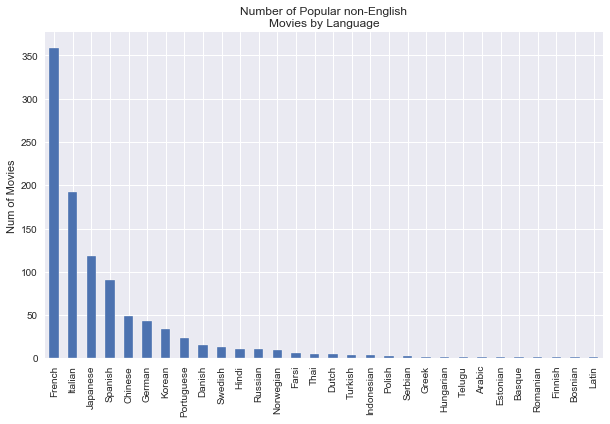

In [74]:
# Plot number of popular movies by language
lang_count_df.plot(kind='bar', legend=False, figsize=(10,6))
plt.title('Number of Popular non-English\nMovies by Language')
plt.xlabel(None)
plt.ylabel('Num of Movies')
plt.show()

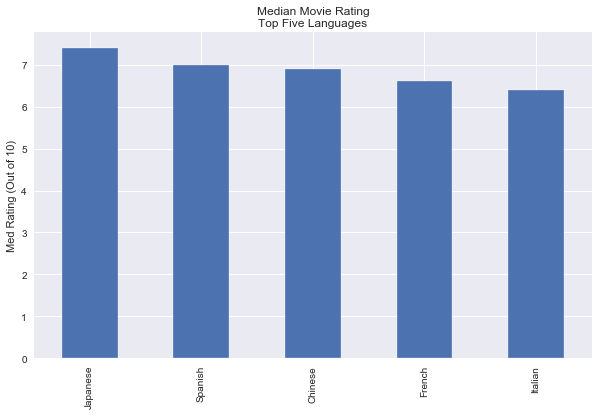

In [136]:
# Plot median rating by language
top_five_df['median_avg_vote'].sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('Median Movie Rating\nTop Five Languages')
plt.xlabel(None)
plt.ylabel('Med Rating (Out of 10)')
plt.show()

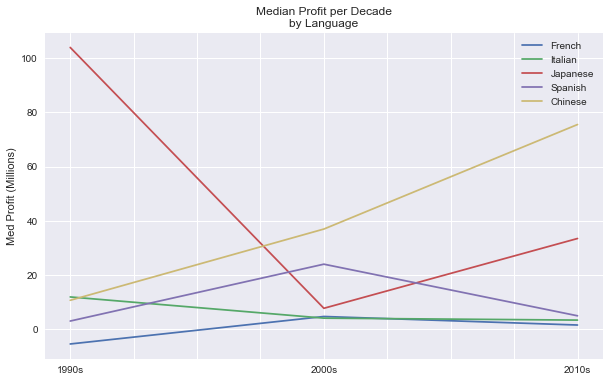

In [113]:
# Plot median profit per decade for top 5 languages
for language in top_five_lang:
    plots[language] = [top_five_lang[language]['90s_median_profit']/1000000,
                       top_five_lang[language]['00s_median_profit']/1000000,
                       top_five_lang[language]['10s_median_profit']/1000000]
plots=pd.DataFrame(plots, index=['1990s', '2000s', '2010s'])
plots.plot(figsize=(10,6))
plt.title('Median Profit per Decade\nby Language')
plt.ylabel('Med Profit (Millions)')
plt.show()

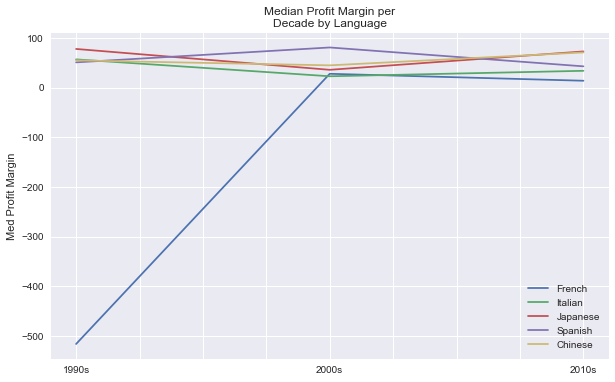

In [116]:
# Plot median profit margin per decade for top 5 languages
for language in top_five_lang:
    plots[language] = [top_five_lang[language]['90s_median_profit_margin'],
                       top_five_lang[language]['00s_median_profit_margin'],
                       top_five_lang[language]['10s_median_profit_margin']]
plots=pd.DataFrame(plots, index=['1990s', '2000s', '2010s'])
plots.plot(figsize=(10,6))
plt.title('Median Profit Margin per\nDecade by Language')
plt.ylabel('Med Profit Margin')
plt.show()

In [ ]:
genre_df2[['90s_avg_profit','00s_avg_profit','10s_avg_profit']].sort_values(by='10s_avg_profit',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Profit per Decade by Genre')
plt.ylabel('$ (in 10 Millions)')
plt.xlabel('Genre')
plt.show()

In [ ]:
genre_df2[['avg_profit','avg_revenue']].sort_values(by='avg_profit',ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Profit and Revenue by Genre')
plt.ylabel('$ (in 10 Millions)')
plt.xlabel('Genre')
plt.show()

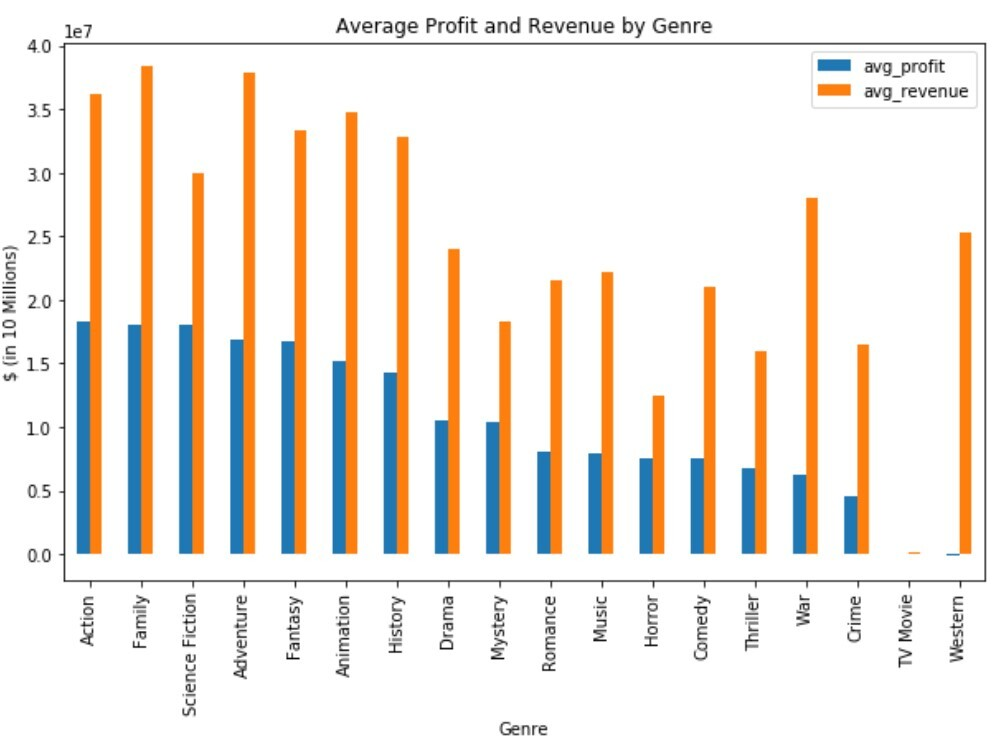

In [ ]:
genre_df2['avg_rating'].sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
plt.title('Average Rating per Genre')
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.show()

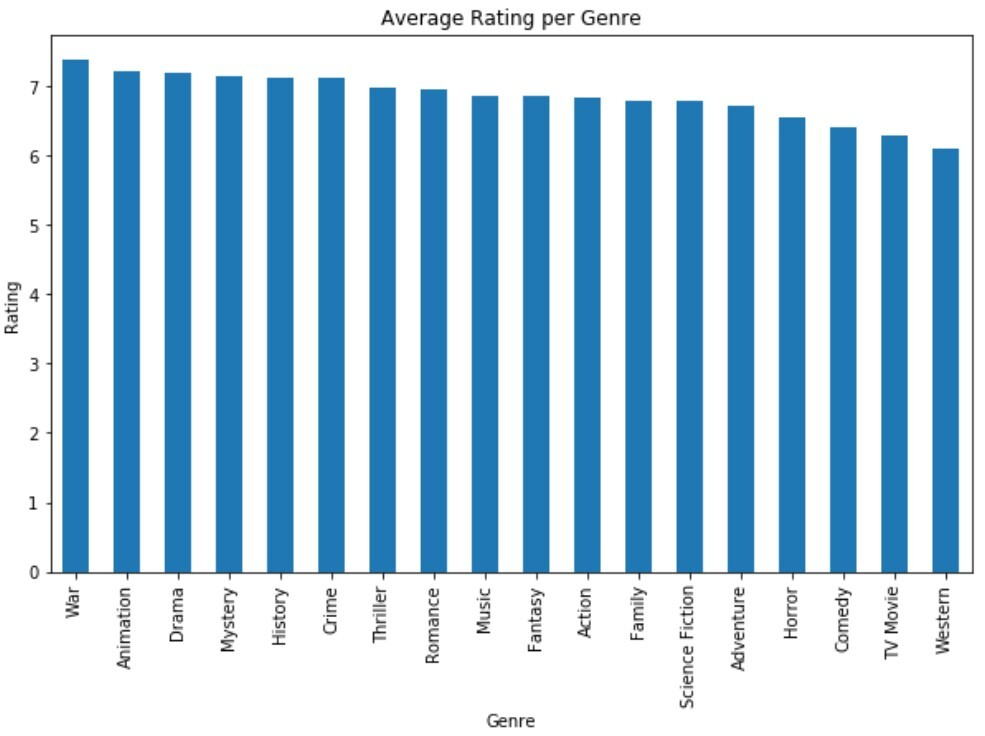